In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *


In [2]:
# ----------------------------#
#        LOSS FUNCTIONS 
# ----------------------------#

def mape(y_test, y_pred):
    return np.mean(np.abs((y_pred-y_test)/y_test))

def mspe(y_test, y_pred):
    return np.mean(np.square((y_pred-y_test)/y_test))

def mae(y_test, y_pred):
    return np.mean(np.abs(y_test - y_pred))


In [3]:
#Number of infected for past two weeks
X = pd.read_csv('data.csv').iloc[:,1:-2].values

#Number of recovered
y_recovered = pd.read_csv('data.csv').iloc[:,-3].values

#Number of deaths
y_deaths = pd.read_csv('data.csv').iloc[:,-2].values

#Number of recovered with transformation to smooth data
y_smoothed = pd.read_csv('data.csv').iloc[:,-1].values

pct_90 = int(np.ceil(90*len(X)/100))
pct_80 = int(np.ceil(80*len(X)/100))
pct_70 = int(np.ceil(70*len(X)/100))
pct_50 = int(np.ceil(50*len(X)/100))
pct_40 = int(np.ceil(40*len(X)/100))

pct = pct_50

X_train, X_test = X[:pct], X[pct:]
y_train, y_test =y_recovered[:pct], y_recovered[pct:]

In [4]:
def baseline_model_k(X_train, y_train, X_test, y_test, k):
    """k is such that y_pred[i] = y_train[i-k]"""
    y_acc = list(y_train)
    y_pred = []
    
    for i in range(len(y_test)):
        y_pred.append(y_acc[-k])
        y_acc.append(y_acc[-k])
        
    #y_pred = y_train[-k:-k-len(y_test):-1]
    return y_acc, y_pred


In [5]:


def plot_baseline(k):
    y_pred_full = baseline_model_k(X_train, y_train, X_test, y_test,k)[0]
    plt.plot(y_pred_full, 'g', y_recovered, 'b')
    plt.xlabel('Day')
    plt.ylabel('Number of Daily Recovered')
    plt.legend(['Predicted value','True value'])
    plt.title('Baseline Prediction model for k=' + str(k))
    plt.axvline(x=pct-1)

def baseline_error(k):
    y_pred = baseline_model_k(X_train, y_train, X_test, y_test, k)[1]
    loss = mape(y_test, y_pred)
    return loss

def find_optimum_k():    
    K = 30
    maes = {}
    mapes = {}
    for k in range(1,K):
        y_pred = baseline_model_k(X_train, y_train, X_test, y_test, k)[1]
        mapes[k] = baseline_error(k)
        maes[k] = mae(y_test, y_pred) 
    return maes, sorted(maes, key=maes.get), mapes, sorted(mapes, key=mapes.get)


In [6]:
y_pred = baseline_model_k(X_train, y_train, X_test, y_test, 5)[1]

In [7]:
mae(y_pred, y_test)

407.9736842105263

In [8]:
f = find_optimum_k()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


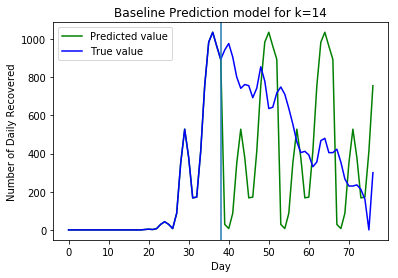

In [28]:
plot_baseline(14)

In [10]:
f

({1: 371.63157894736844,
  2: 402.92105263157896,
  3: 437.60526315789474,
  4: 441.44736842105266,
  5: 407.9736842105263,
  6: 372.7894736842105,
  7: 390.9736842105263,
  8: 412.94736842105266,
  9: 377.2368421052632,
  10: 353.2894736842105,
  11: 350.60526315789474,
  12: 388.89473684210526,
  13: 395.86842105263156,
  14: 371.92105263157896,
  15: 376.94736842105266,
  16: 392.2631578947368,
  17: 408.6842105263158,
  18: 437.7105263157895,
  19: 461.7894736842105,
  20: 470.2368421052632,
  21: 460.92105263157896,
  22: 471.6578947368421,
  23: 491.3421052631579,
  24: 486.10526315789474,
  25: 489.0,
  26: 486.0,
  27: 486.8421052631579,
  28: 489.92105263157896,
  29: 488.13157894736844},
 [11,
  10,
  1,
  14,
  6,
  15,
  9,
  12,
  7,
  16,
  13,
  2,
  5,
  17,
  8,
  3,
  18,
  4,
  21,
  19,
  20,
  22,
  26,
  24,
  27,
  29,
  25,
  28,
  23],
 {1: inf,
  2: inf,
  3: inf,
  4: inf,
  5: inf,
  6: inf,
  7: inf,
  8: inf,
  9: inf,
  10: inf,
  11: inf,
  12: inf,
  13